In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur ...,NaN,NaN,1200.0,2.0,1.0,51.00


In [3]:
df = df[['location', 'size', 'total_sqft', 'bath' ,'price']]
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur ...,NaN,1200.0,2.0,51.00


In [4]:
import math

def split(x):
    if isinstance(x, float) and math.isnan(x):  # Check if x is a NaN value
        return None  # Return None for NaN values
    elif isinstance(x, float):  # Check if x is a float
        return int(x)  # Convert float to integer
    else:
        z = x.split(' ')[0]
        return int(z)

df["bhk"] = df["size"].apply(split)

In [5]:
df.drop(['size'],axis='columns').head(50)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur ...,1200.0,2.0,51.00,NaN
5,NaN,NaN,NaN,NaN,NaN


In [6]:
df['total_sqft'].describe()

count       5.000000
mean     1563.400000
std       608.497987
min      1056.000000
25%      1200.000000
50%      1440.000000
75%      1521.000000
max      2600.000000
Name: total_sqft, dtype: float64

In [7]:
df.shape
df1 = df.dropna()
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0


In [8]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [9]:
df1.total_sqft.unique()

array([1056., 2600., 1440., 1521.])

In [10]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [11]:
def convert(x):
  x = str(x)
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1])/2)
  try:
    return float(x)
  except:
    return None

df1['total_sqft'] = df1['total_sqft'].apply(convert)
df1.head(40)

<ipython-input-11-649f0f5c37ed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_sqft'] = df1['total_sqft'].apply(convert)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0


In [15]:
df2 = df1.copy()
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head(32)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861


In [16]:
len(df2.location.unique())

4

In [17]:
df2.location = df2.location.apply(lambda x: str(x).strip())

location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Chikka Tirupathi            1
Electronic City Phase II    1
Lingadheeranahalli          1
Uttarahalli                 1
Name: location, dtype: int64

In [18]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
Chikka Tirupathi            1
Electronic City Phase II    1
Lingadheeranahalli          1
Uttarahalli                 1
Name: location, dtype: int64

In [19]:
df2.location = df2['location'].apply(lambda x : 'other' if x in location_less_than_10 else x)

In [20]:
len(df2.location.unique())

1

In [21]:
df3 = df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(4, 7)

In [22]:
df3.head(32)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,other,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3.0,6245.890861


In [23]:
df3.price_per_sqft.describe()

count       4.000000
mean     4716.660410
std      1088.085978
min      3699.810606
25%      4154.119318
50%      4460.470085
75%      5023.011177
max      6245.890861
Name: price_per_sqft, dtype: float64

In [24]:
def remove_outlier(df):
  df_out = pd.DataFrame()
  for key, subf in df.groupby('location'):
    m = np.mean(subf.price_per_sqft)
    st = np.std(subf.price_per_sqft)
    reduced_df = subf[(subf.price_per_sqft>(m-st)) & (subf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df4 = remove_outlier(df3)
df4.shape

(2, 7)

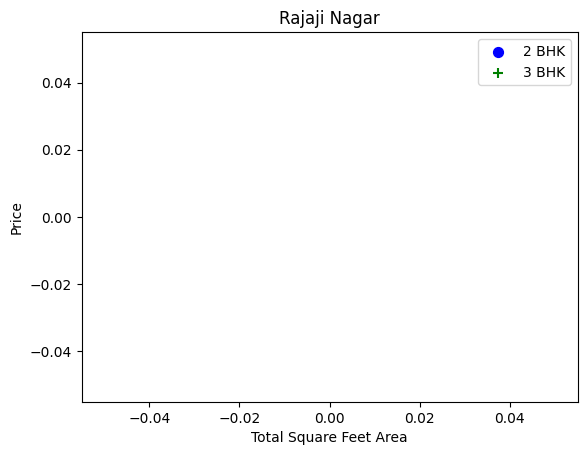

In [25]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]

  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df4,"Rajaji Nagar")

In [26]:
def remove_bhk_outlier(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [27]:
df5 = remove_bhk_outlier(df4)
df5.shape

(2, 7)

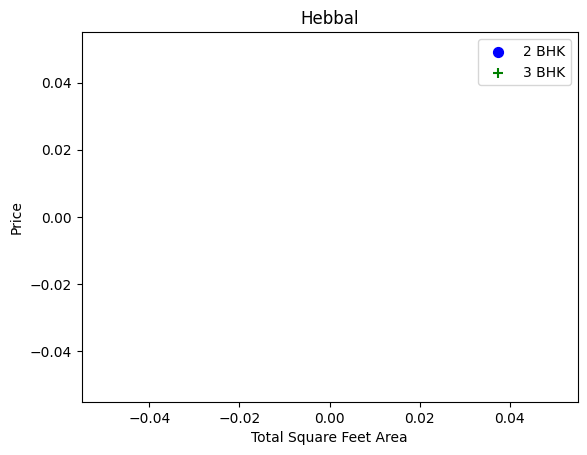

In [28]:
plot_scatter_chart(df5,'Hebbal')

In [29]:
df5[df5.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


Text(0, 0.5, 'Count')

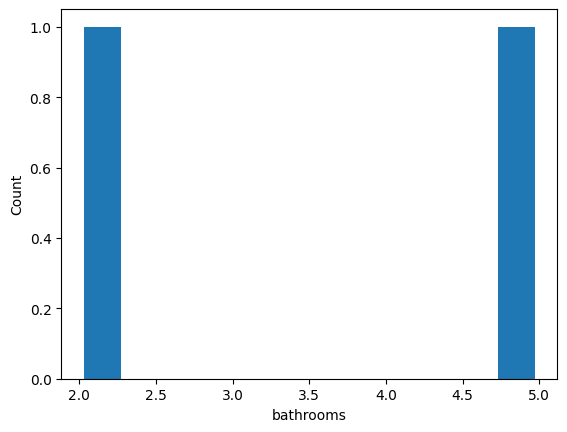

In [30]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel('bathrooms')
plt.ylabel('Count')

In [31]:
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [32]:
df6 = df5

In [33]:
df7 = df6.drop(['size','price_per_sqft'],axis='columns')
df7.head(3)

,location,total_sqft,bath,price,bhk
0,other,2600.0,5.0,120.0,4.0
1,other,1440.0,2.0,62.0,3.0


In [34]:
dummies = pd.get_dummies(df7.location)
dummies.head(3)

,other
0,1
1,1


In [35]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head(3)

,location,total_sqft,bath,price,bhk
0,other,2600.0,5.0,120.0,4.0
1,other,1440.0,2.0,62.0,3.0


In [36]:
df9 = df8.drop('location',axis='columns')
df9.head(2)

,total_sqft,bath,price,bhk
0,2600.0,5.0,120.0,4.0
1,1440.0,2.0,62.0,3.0


In [37]:
df9.shape

(2, 4)

In [38]:
X = df9.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk
0,2600.0,5.0,4.0
1,1440.0,2.0,3.0


In [39]:
y = df9.price
y.head()

0    120.0
1     62.0
Name: price, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [41]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [42]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

array([nan, nan, nan, nan, nan])

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearch(X,y):
  algos = {
       'linear_regression': {
          'model': LinearRegression(),
          'params': {
              'n_jobs' : [1,2,3]
          }
      },

      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha' : [1,2],
              'selection' : ['random', 'cyclic']
          }
      },
      'decison_tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['poisson','friedman_mse'],
              'splitter' : ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5 , test_size=0.2, random_state=0)
  for algo_name,config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model':algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_

    })

  return pd.DataFrame(scores, columns=['model','best_score','best_params'])


find_best_model_using_gridsearch(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

,model,best_score,best_params
0,linear_regression,NaN,{'n_jobs': 1}
1,lasso,NaN,"{'alpha': 1, 'selection': 'random'}"
2,decison_tree,NaN,"{'criterion': 'poisson', 'splitter': 'best'}"


In [44]:
def predict_price(location,sqft,bath,bhk):
  loc_index = np.where(X.columns==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
  return lr_clf.predict([x])[0]

In [45]:
predict_price('Vijayanagar', 1200, 3, 3)

IndexError: ignored

In [46]:
predict_price('Vijayanagar', 800, 2, 2)

IndexError: ignored